# 📈 Most Demanded Skills for Top 3 Data Roles

### **Methodology**
1. Clean-up skill column  
2. Calculate skill count based on `job_title_short`  
3. Calculate skill percentage  
4. Plot final findings  

---

## 🛠 **Setup: Import Libraries and Load Data**

We will use the **full job postings dataset (2023–2024)** from [datanerd.tech](https://datanerd.tech) to analyze US Data Analyst skills.  

> **Dataset Source:**  
> - Originally part of the Python Data Analyst course, extended with full dataset covering 2023 through the latest update.  
> - File: `job_postings_flat.csv` (local CSV, not pushed to GitHub due to size >100MB).  
> - Updated twice a year to reflect the most recent job trends.

We filter to **2024** to focus on the most recent complete year, ensuring our analysis of skill demand and salary is current and relevant.

In [11]:
# Import required libraries
import ast
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Configure data source - Base project directory
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Full path to CSV using relative structure
CSV_PATH = os.path.join(BASE_DIR, 'data', 'Job_Postings_2023-2024.csv')

# Load data automatically
if os.path.exists(CSV_PATH):
    print(f"Loading local CSV from '{CSV_PATH}'...")
    df = pd.read_csv(CSV_PATH)
else:
    print("Local CSV not found. Loading dataset from Hugging Face...")
    dataset = load_dataset('lukebarousse/data_jobs')
    df = dataset['train'].to_pandas()

# Clean and prepare data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df = df[df['job_posted_date'].dt.year == 2024]

print(f"Data loaded successfully!")

Loading local CSV from '/Users/nadia_rozman/Python_for_Data_Analytics/Project/data/Job_Postings_2023-2024.csv'...
Data loaded successfully!


## 🔍 **Filter Data for the United States**
We focus on the US job market.

In [2]:
# Focus on US job market
df_US = df[df['job_country'] == 'United States']

## 💡 **Explode Skills**
Convert the `job_skills` column from list strings to actual lists and expand so each skill appears in its own row.

In [3]:
# Ensure each skill has its own row for accurate aggregation
df_skills = df_US.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
787356,"Summer Internship -Data Analyst Intern, Risk M...",excel
787357,"Summer Internship -Data Analyst Intern, Risk M...",excel
787358,"Staff Data Analyst Operations, Infrastructure ...",tableau
787358,"Staff Data Analyst Operations, Infrastructure ...",flow
787359,"Staff Data Analyst Operations, Infrastructure ...",tableau
...,...,...
1271314,Machine Learning Operations Data Engineer IV -...,pandas
1271314,Machine Learning Operations Data Engineer IV -...,scikit-learn
1271314,Machine Learning Operations Data Engineer IV -...,tidyverse
1271314,Machine Learning Operations Data Engineer IV -...,docker


## 📊 **Count Skills per Job Title**
Group by `job_skills` and `job_title_short`, count occurrences, and sort descending.

In [4]:
# Group by skill and job title, count occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1159,python,Data Scientist,23758
1459,sql,Data Engineer,21966
1158,python,Data Engineer,21395
1458,sql,Data Analyst,19907
1460,sql,Data Scientist,16186
...,...,...,...
110,aurora,Cloud Engineer,1
738,kotlin,Cloud Engineer,1
1566,terminal,Cloud Engineer,1
100,atlassian,Cloud Engineer,1


## 🎯 **Top 3 Roles**
Focus on the most popular roles: Data Analyst, Data Engineer, Data Scientist.

In [5]:
# Focus on most popular roles: Data Analyst, Data Engineer, Data Scientist
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

## 📈 **Plot Skill Counts**
Stacked horizontal bar chart for top 5 skills per role.

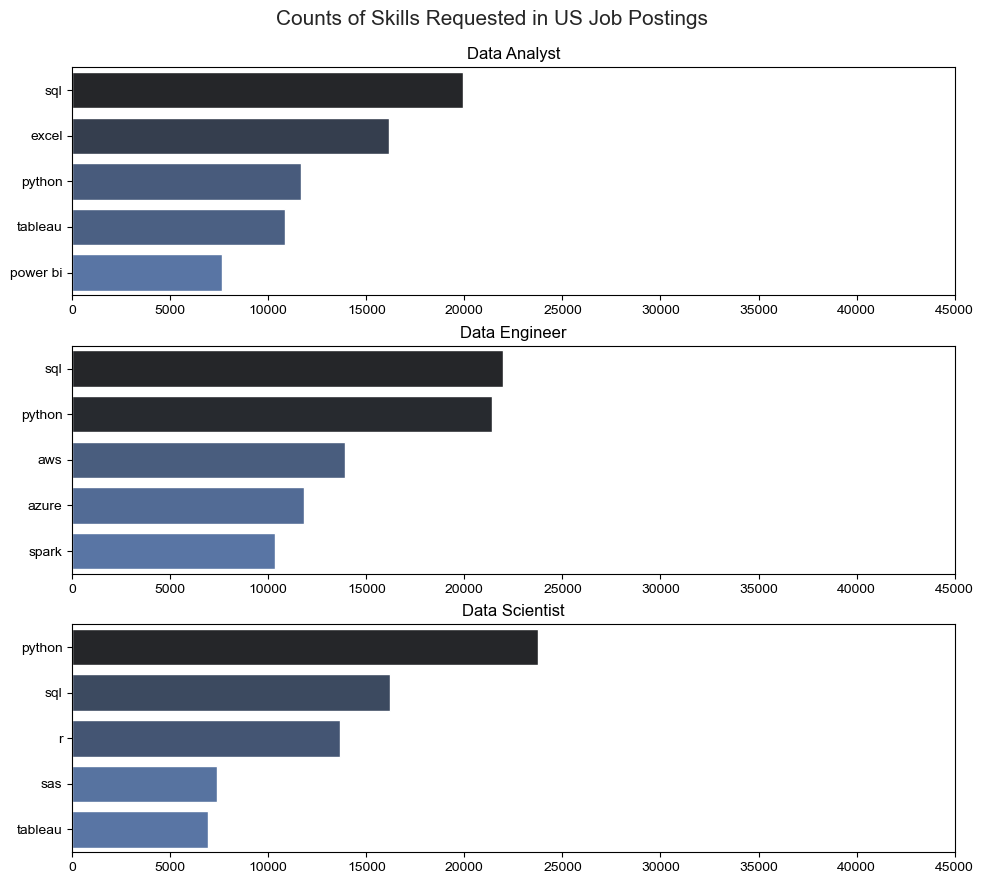

In [6]:
# Create stacked horizontal bar chart for top 5 skills per role
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, len(job_titles)*3))
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    # Select top 5 skills for each role, invert for horizontal bar chart
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000) # Fixed x-axis for comparability

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

## 📊 **Convert Counts to Percentages**
Calculate the percentage of each skill for its job title to understand relative demand.

In [7]:
# Calculate percentage of each skill for its job title
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

# Merge and calculate skill percentages
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,23758,33888,70.107413
1,sql,Data Engineer,21966,33527,65.517344
2,python,Data Engineer,21395,33527,63.814239
3,sql,Data Analyst,19907,41405,48.078734
4,sql,Data Scientist,16186,33888,47.763220
...,...,...,...,...,...
1795,aurora,Cloud Engineer,1,422,0.236967
1796,kotlin,Cloud Engineer,1,422,0.236967
1797,terminal,Cloud Engineer,1,422,0.236967
1798,atlassian,Cloud Engineer,1,422,0.236967


## 📊 **Plot Skill Percentages**
Top 5 skills per role as percentage of jobs requesting them.

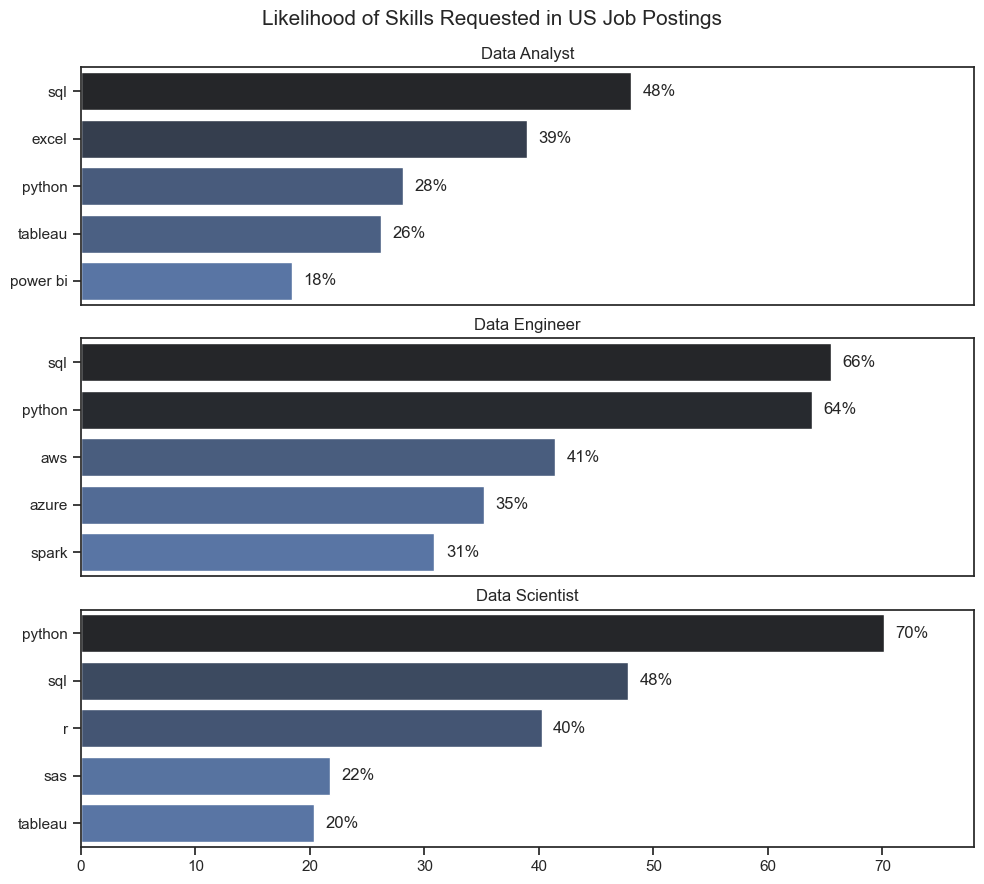

Figure saved successfully!


In [13]:
# Display top 5 skills per role as percentage of jobs
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, len(job_titles)*3))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    
    legend = ax[i].get_legend()
    if legend:
        legend.remove()
    
    ax[i].set_xlim(0, 78)   # Standardized x-axis
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # Add percentage labels to bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.8)

# Save figure
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  
IMAGES_DIR = os.path.join(BASE_DIR, 'images')
os.makedirs(IMAGES_DIR, exist_ok=True)

# Output file name
FIG_FILENAME = '1_Likelihood_of_Skills_Requested_in_US_Job_Postings.png'
FIG_PATH = os.path.join(IMAGES_DIR, FIG_FILENAME)

plt.savefig(FIG_PATH, dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure saved successfully!")

## 📌 **Key Takeaways: Skill Demand Across Data Roles**

### 🧱 **Foundation Skills Are Universal**
- **SQL** and **Python** form the backbone of all data roles  
- **SQL** appears in **48–66%** of postings across Analysts, Engineers, and Scientists  
- **Python** ranges from **28–70%**, increasing sharply with role complexity  
- These two skills are **non-negotiable entry points** into the data field


### 🎯 **Each Role Has a Distinct Technical Identity**

#### 📊 Data Analyst — Business Intelligence Focus
- Strong emphasis on reporting and communication tools:
  - **Excel (39%)**
  - **Tableau (26%)**
  - **Power BI (18%)**
- Lower Python demand (**28%**) reflects prioritization of visualization over programming
- Skill set optimized for dashboards, insights, and stakeholder communication

#### 🏗 Data Engineer — Infrastructure Specialist
- Dominated by cloud and big-data technologies:
  - **AWS (41%)**
  - **Azure (35%)**
  - **Spark (31%)**
- Nearly equal demand for **SQL (66%)** and **Python (64%)**
- Skills centered on building and maintaining scalable data pipelines

#### 🤖 Data Scientist — Advanced Analytics Expert
- **Python (70%)** is the most demanded skill across all roles
- Statistical tools appear almost exclusively in this role:
  - **R (40%)**
  - **SAS (22%)**
- Highest technical bar, with focus on modeling, experimentation, and machine learning

---

### 📈 **Python Demand Scales with Role Complexity**
Python requirements rise sharply with seniority and technical depth:
- **Data Analyst**: 28% (nice to have)
- **Data Engineer**: 64% (nearly essential)
- **Data Scientist**: 70% (critical)

This **2.5× increase** makes Python the clearest indicator of role complexity and long-term compensation potential.


### ☁️ **Cloud Skills Define the Engineering Path**
- **AWS** and **Azure** appear **only** in Data Engineer top skills
- No meaningful presence in Analyst or Scientist rankings
- Cloud infrastructure knowledge clearly differentiates engineering roles from analytical positions



### 📊 **Visualization Tools Reflect Business Proximity**
- **Tableau** appears in both Analyst (**26%**) and Scientist (**20%**) roles
- **Power BI** (**18%**) is specific to Data Analysts
- Engineers focus on data movement and infrastructure rather than visualization

---

### 💼 **Career Strategy Recommendations**

🎯 **For Aspiring Data Analysts**
1. Master **SQL** first (48% demand, highest ROI)
2. Build strong **Excel** fundamentals (39% demand, often underestimated)
3. Learn **Tableau** or **Power BI** for visualization
4. Add **Python** as a differentiator (only 28% of roles currently require it)

🔁 **For Transitioning to Data Engineer**
1. Elevate **Python** to production-level proficiency (64% demand)
2. Gain experience with at least one cloud platform (**AWS** or **Azure**)
3. Learn **Spark** for large-scale data processing (31% demand)
4. Maintain strong **SQL** fundamentals (66% requirement)

🚀 **For Advancing to Data Scientist**
1. Achieve **Python mastery** (70% demand — highest across all roles)
2. Learn **R** for statistical computing (40% demand)
3. Maintain **SQL** proficiency (48% requirement)
4. Develop depth in machine learning and statistical modeling

---

### 🧭 **Universal Career Insight**
The data reveals a clear skill progression pathway:

**SQL + Excel + Tableau → Python + Cloud → R + Machine Learning**

This ladder approach allows professionals to:
- Become employable early
- Transition between roles strategically
- Build toward advanced, higher-impact positions over time